
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs


# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
import os
import pickle
import numpy as np

def load_cifar10_data(data_dir, num_batches=5):
    x_train = []
    y_train = []
    for batch_idx in range(1, num_batches+1):
        filename = os.path.join(data_dir, f'data_batch_{batch_idx}')
        with open(filename, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
        x_train.append(data[b'data'])
        y_train += data[b'labels']
    x_train = np.concatenate(x_train, axis=0)
    x_train = x_train.reshape((-1, 3, 32, 32))
    x_train = np.transpose(x_train, (0, 2, 3, 1))
    y_train = np.array(y_train)

    filename = os.path.join(data_dir, 'test_batch')
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    x_test = data[b'data']
    y_test = np.array(data[b'labels'])
    x_test = x_test.reshape((-1, 3, 32, 32))
    x_test = np.transpose(x_test, (0, 2, 3, 1))

    return x_train, y_train, x_test, y_test


In [3]:
data_dir = ('J:\\New courses\\cifar-10-python\\cifar-10-batches-py')
x_train, y_train, x_test, y_test = load_cifar10_data(data_dir)


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train = y_train.reshape((-1,1))

In [7]:
y_test = y_test.reshape((-1,1))

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[0]


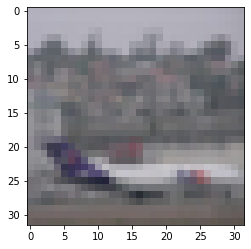

In [10]:
i = 30000
plt.imshow(x_train[i])
print(y_train[i])

C:\Users\Glavian\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


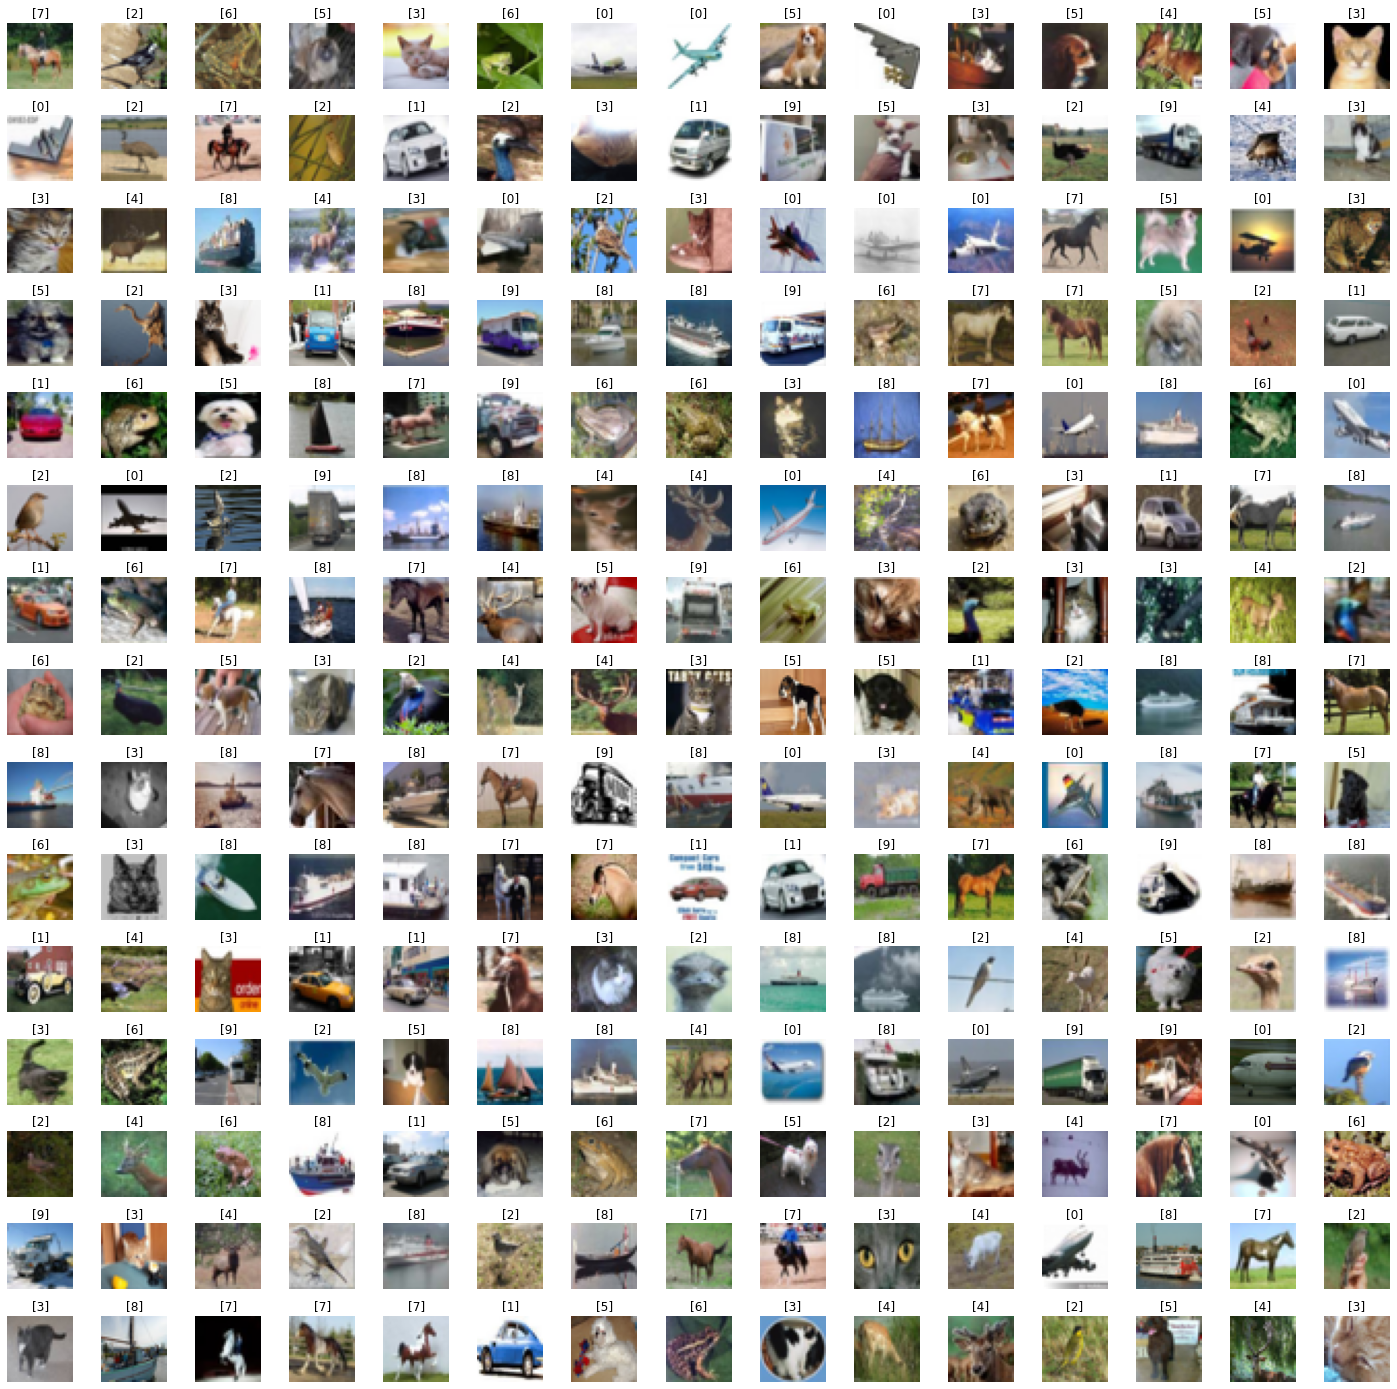

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace = 0.4)

# STEP #3: DATA PREPARATION

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
number_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]])

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
Input_shape = x_train.shape[1:]
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu', input_shape = (32, 32, 3)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= 'relu' ))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= 'relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [22]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [23]:
history = cnn_model.fit(x_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 137s 87ms/step - loss: 1.6370 - accuracy: 0.4136


# STEP #5: EVALUATE THE MODEL

In [24]:
evaluation = cnn_model.evaluate(x_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 15ms/step - loss: 1.1956 - accuracy: 0.5813
Test Accuracy: 0.5813000202178955


In [25]:
predictions = cnn_model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

# Convert predicted classes from float to integer
predicted_classes = predicted_classes.astype(int)
predicted_classes

313/313 [==============================] - 5s 16ms/step


array([3, 8, 8, ..., 7, 4, 7])

In [26]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
y_test = y_test.argmax(1)

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

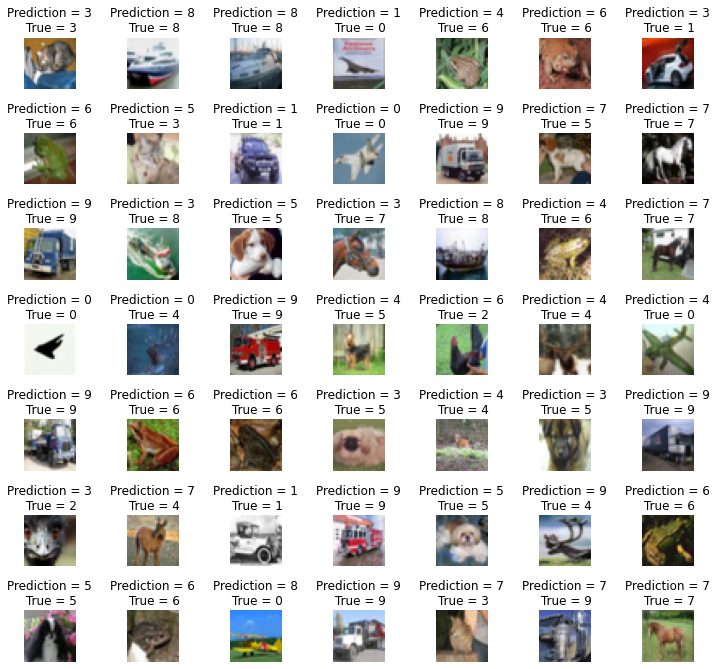

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'. format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<AxesSubplot:>

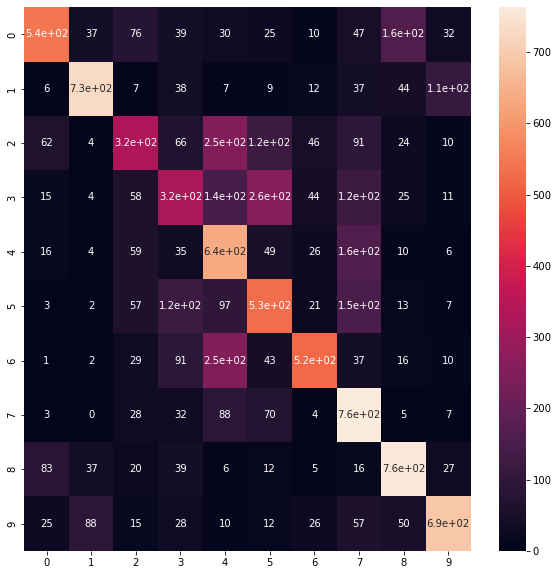

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [32]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP 7 MODEL TRAINING USING AUGEMENTED DATASET¶

In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True,
                            )

In [41]:
datagen.fit(x_train)

In [57]:
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 128s 82ms/step - loss: 2.3142 - accuracy: 0.2852
Epoch 2/2
1563/1563 [==============================] - 128s 82ms/step - loss: 1.8651 - accuracy: 0.3302


In [55]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)


In [56]:
y_train.shape

(50000, 10)

In [58]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_augmentation_trained_model.h5')
cnn_model.save(model_path)